In [28]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END, Graph
import random

Define State and Nodes

In [29]:
# State as a typed dict class
class State(TypedDict):
    graph_state: str

In [30]:
# nodes as functions
def node1(state):
    return {"graph_state" : state['graph_state'] + "I am "}

def node2(state):
    return {"graph_state" : state['graph_state'] + "a "}

def node2neg(state):
    return {"graph_state" : state['graph_state'] + "not a "}

def node3(state):
    return {"graph_state" : state['graph_state'] + "stupid person."}

Define conditional edge

In [31]:
def decide_mood(state) -> Literal["node2", "node2neg"]:
    print("user input", state['graph_state'])

    if random.random() > 0.5:
        return "node2"
    else:
        return "node2neg"

    

Build graph

In [32]:
# define empty state graph
final_graph = StateGraph(State)

# add nodes which are functions 
final_graph.add_node("node1", node1)
final_graph.add_node("node2", node2)
final_graph.add_node("node2neg", node2neg)
final_graph.add_node("node3", node3)

# add edges 
final_graph.add_edge(START, "node1")
final_graph.add_conditional_edges("node1", decide_mood)
final_graph.add_edge("node2", "node3")
final_graph.add_edge("node2neg", "node3")
final_graph.add_edge("node3", END)

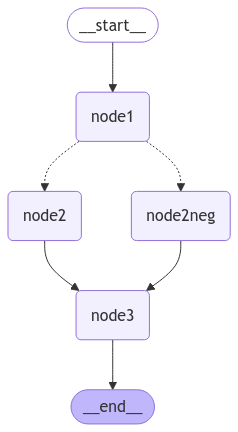

In [42]:
from IPython.display import Image, display

# finally compile the graph 
graph = final_graph.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [51]:
graph.invoke({"graph_state" : "Hi, this is Lance. "})

user input Hi, this is Lance. I am 


{'graph_state': 'Hi, this is Lance. I am not a stupid person.'}